In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv('lang_info.csv')

In [4]:
df.head()

,DOI,publication_date,total_size_kb,num_files,bash,stata,julia,python,R,C,C++,Matlab,fortran,SAS,Java,SPSS,Mathematica,PHP,Scilab,ArcGIS
0,10.7910/DVN/HWLW0J,2019-06-21,2013.58,17,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,10.7910/DVN/YU84D7,2019-06-20,1260.31,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.7910/DVN/RXXQSQ,2019-06-19,429.73,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.7910/DVN/UYXRI8,2019-06-17,27781.61,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,10.7910/DVN/O6VHZZ,2019-06-14,1265.88,44,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

DOI                  object
publication_date     object
total_size_kb       float64
num_files             int64
bash                  int64
stata                 int64
julia                 int64
python                int64
R                     int64
C                     int64
C++                   int64
Matlab                int64
fortran               int64
SAS                   int64
Java                  int64
SPSS                  int64
Mathematica           int64
PHP                   int64
Scilab                int64
ArcGIS                int64
dtype: object

In [12]:
df.shape

(379, 20)

In [22]:
str(df[0:1]['publication_date'])

'0    2019-06-21\nName: publication_date, dtype: object'

In [25]:
df['publication_date'][0]

'2019-06-21'

In [26]:
df.isnull().sum()

DOI                 0
publication_date    0
total_size_kb       0
num_files           0
bash                0
stata               0
julia               0
python              0
R                   0
C                   0
C++                 0
Matlab              0
fortran             0
SAS                 0
Java                0
SPSS                0
Mathematica         0
PHP                 0
Scilab              0
ArcGIS              0
dtype: int64

In [34]:
df['num_files'].describe()

count    379.000000
mean      14.232190
std       19.105636
min        0.000000
25%        3.000000
50%        8.000000
75%       16.000000
max      157.000000
Name: num_files, dtype: float64

In [63]:
df.groupby('num_files')['DOI'].describe()

,count,unique,top,freq
num_files,,,,
0,1,1,10.7910/DVN/0HHML7,1
1,29,29,10.7910/DVN/24797,1
2,40,40,10.7910/DVN/SRLERE,1
3,26,26,10.7910/DVN/25505,1
4,32,32,10.7910/DVN/INOLBS,1
5,18,18,10.7910/DVN/SURSEO,1
6,20,20,10.7910/DVN/XA5DRD,1
7,17,17,10.7910/DVN/HUZNE2,1
8,22,22,10.7910/DVN/RYNSDG,1


In [78]:
df['num_files'].value_counts()

2      40
4      32
1      29
3      26
8      22
6      20
5      18
10     17
7      17
13     13
11     11
14     10
12      9
9       8
15      8
18      7
33      7
34      7
21      6
17      5
16      5
24      4
28      4
37      3
35      3
20      3
27      3
26      3
44      2
40      2
       ..
31      2
22      1
19      1
157     1
30      1
134     1
133     1
91      1
81      1
80      1
76      1
73      1
72      1
71      1
66      1
64      1
63      1
62      1
57      1
54      1
53      1
52      1
50      1
49      1
46      1
45      1
41      1
38      1
32      1
0       1
Name: num_files, Length: 62, dtype: int64

In [41]:
# set the size and resolution of following plots.
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = [6.4,4.8]

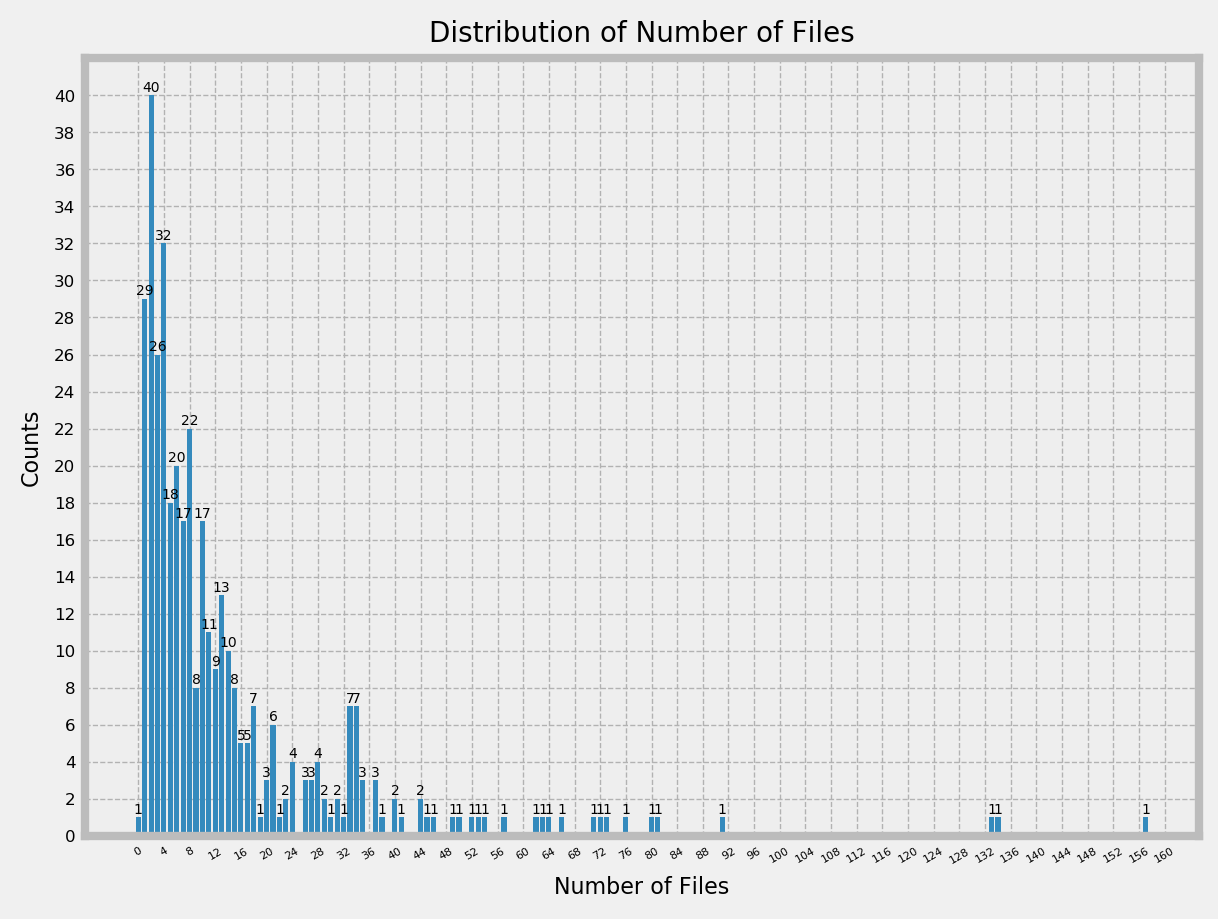

In [132]:
stat_1 = df.groupby('num_files')['DOI'].describe()
x = df.groupby('num_files')['DOI'].describe().index
y = stat_1['count']
plt.bar(x, y,width = 0.8,align='center')
plt.xticks(np.linspace(0,160,41),fontsize=4,rotation=30)
plt.yticks(np.linspace(0,40,21),fontsize=6)
plt.title('Distribution of Number of Files', fontsize=10)
plt.xlabel("Number of Files", fontsize=8)
plt.ylabel("Counts", fontsize=8)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=5)
plt.style.use('bmh')

In [99]:
df['total_size_kb'].describe()

count    3.790000e+02
mean     1.108721e+05
std      4.658173e+05
min      0.000000e+00
25%      4.843700e+02
50%      2.777790e+03
75%      2.365952e+04
max      5.397832e+06
Name: total_size_kb, dtype: float64

In [100]:
df.groupby('total_size_kb')['DOI'].describe()

,count,unique,top,freq
total_size_kb,,,,
0.00,1,1,10.7910/DVN/0HHML7,1
3.94,1,1,10.7910/DVN/28582,1
6.00,1,1,10.7910/DVN/AHMMUA,1
12.05,1,1,10.7910/DVN/VVCBHZ,1
14.12,1,1,10.7910/DVN/29242,1
15.13,1,1,10.7910/DVN/PBAW0O,1
17.18,1,1,10.7910/DVN/24859,1
22.86,1,1,10.7910/DVN/23972,1
24.71,1,1,10.7910/DVN/26783,1


In [111]:
df.loc[df['total_size_kb'] > 0, 'size_level'] = 1
df.loc[df['total_size_kb'] > 100, 'size_level'] = 2
df.loc[df['total_size_kb'] > 1000, 'size_level'] = 3
df.loc[df['total_size_kb'] > 10000, 'size_level'] = 4
df.loc[df['total_size_kb'] > 100000, 'size_level'] = 5

In [114]:
df.groupby('size_level')['DOI'].describe()

,count,unique,top,freq
size_level,,,,
1.0,33,33,10.7910/DVN/24975,1
2.0,102,102,10.7910/DVN/UMIBSL,1
3.0,117,117,10.7910/DVN/SURSEO,1
4.0,77,77,10.7910/DVN/DTFR60,1
5.0,50,50,10.7910/DVN/QBHGRC,1


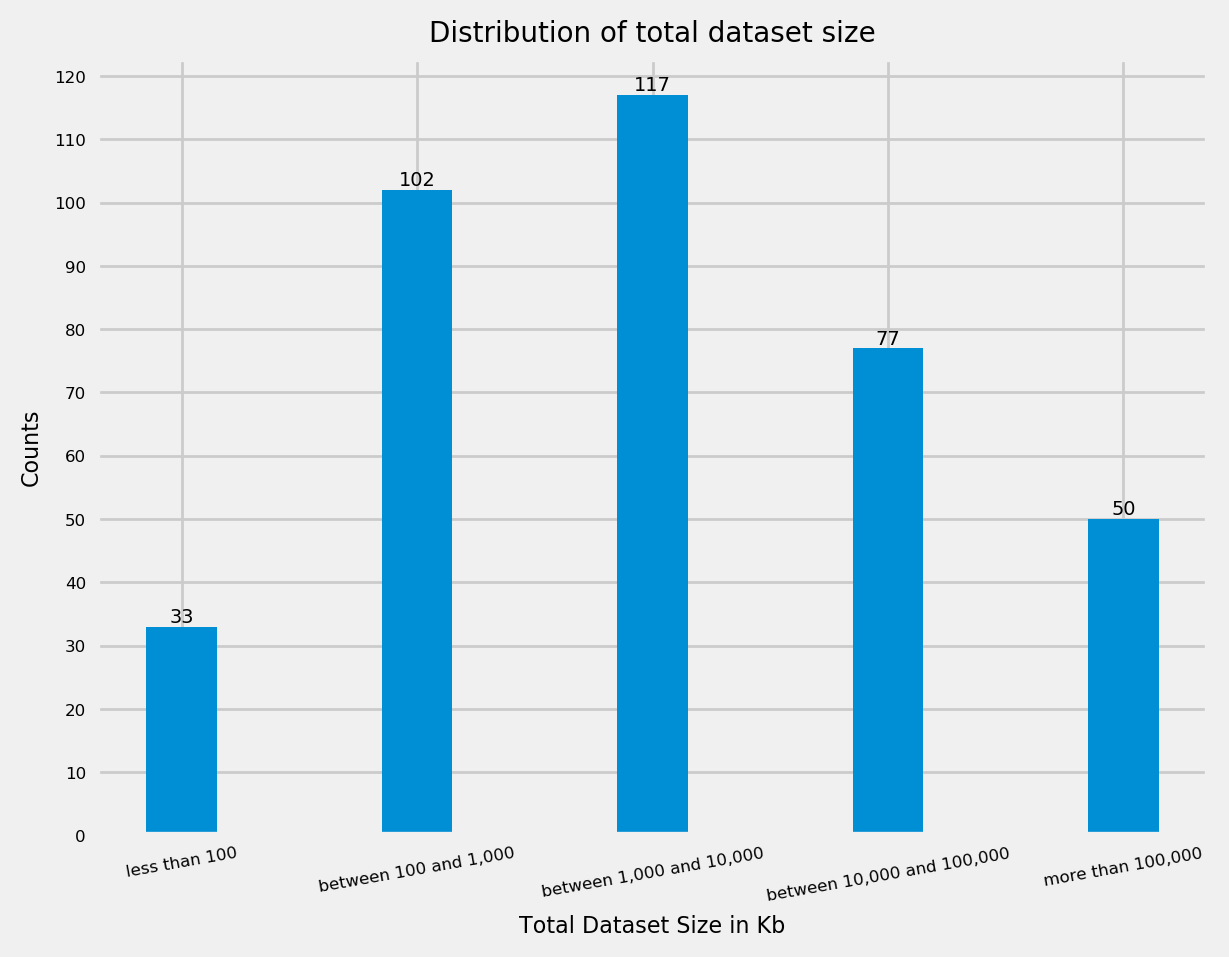

In [141]:
stat_2 = df.groupby('size_level')['DOI'].describe()
x = df.groupby('size_level')['DOI'].describe().index
y = stat_2['count']
plt.bar(x, y,width = 0.3,align='center')
xtick = ['less than 100', 'between 100 and 1,000', 'between 1,000 and 10,000', 'between 10,000 and 100,000', 'more than 100,000']
plt.xticks(x,xtick,fontsize=6,rotation=10)
plt.yticks(np.linspace(0,120,13),fontsize=6)
plt.title('Distribution of total dataset size', fontsize=10)
plt.xlabel("Total Dataset Size in Kb", fontsize=8)
plt.ylabel("Counts", fontsize=8)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.style.use('fivethirtyeight')

In [143]:
df.loc['Row_sum'] = df.apply(lambda x: x.sum())

In [148]:
df.loc['Row_sum']

DOI                 10.7910/DVN/HWLW0J10.7910/DVN/YU84D710.7910/DV...
publication_date    2019-06-212019-06-202019-06-192019-06-172019-0...
total_size_kb                                             4.20205e+07
num_files                                                        5394
bash                                                               10
stata                                                             804
julia                                                               0
python                                                             15
R                                                                 855
C                                                                   0
C++                                                                 0
Matlab                                                              8
fortran                                                             0
SAS                                                                 5
Java                

In [186]:
x = []
y = []
lang_total_dict = dict(df.loc['Row_sum']['bash':'ArcGIS'])
for key in lang_total_dict.keys():
    if lang_total_dict[key] != 0:
        x.append(key)
        y.append(lang_total_dict[key])
for item in y:
    item = item / sum(y)
x,y

(['bash',
  'stata',
  'python',
  'R',
  'Matlab',
  'SAS',
  'SPSS',
  'Mathematica',
  'PHP',
  'Scilab',
  'ArcGIS'],
 [10, 804, 15, 855, 8, 5, 12, 5, 5, 13, 6])

In [187]:
z =[]
for item in y:
    item = item / sum(y) * 100
    z.append(item)
z

[0.5753739930955121,
 46.260069044879174,
 0.863060989643268,
 49.19447640966628,
 0.46029919447640966,
 0.28768699654775604,
 0.6904487917146145,
 0.28768699654775604,
 0.28768699654775604,
 0.7479861910241657,
 0.34522439585730724]

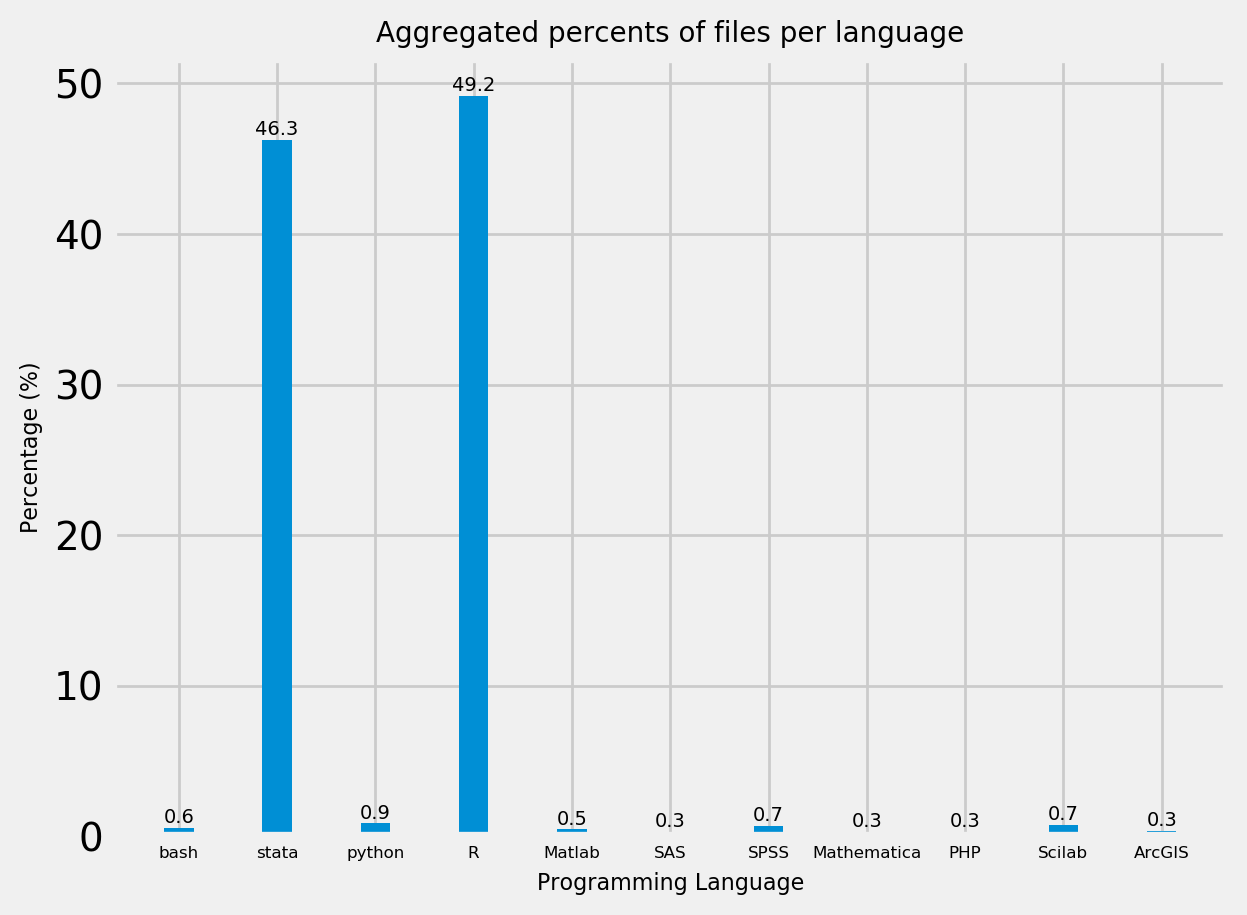

In [191]:
plt.bar(x, z, width = 0.3,align='center')
plt.xticks(x,fontsize=6)
plt.title('Aggregated percents of files per language', fontsize=10)
plt.xlabel("Programming Language", fontsize=8)
plt.ylabel("Percentage (%)", fontsize=8)
for a,b in zip(x,z):
    plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=7)
plt.style.use('fivethirtyeight')